# 1. Loading data

In [13]:
# Import packages
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load the CSV data from the GitHub link
url = 'https://raw.githubusercontent.com/FilipJanikulaS22660/ASI_grupa_6/main/data/heart_disease.xlsx'

# file_path = Path(url)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    data = pd.read_excel(url, engine='openpyxl')
elif file_extension == 'xls':
    data = pd.read_excel(url)
elif file_extension == 'csv':
    data = pd.read_csv(url)
else:
    raise Exception("File not supported")

# 2. Exploratory data analysis

In [7]:
# Basic info about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# Check how many records are null
null_counts = pd.DataFrame(data[data.select_dtypes('number').columns].isna().sum(), columns=['Null Counts'])
null_counts

,Null Counts
BMI,0
PhysicalHealth,0
MentalHealth,0
SleepTime,0


In [9]:
# First five rows of data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [11]:
data.describe().applymap(lambda x: f"{x:0.1f}")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.0,319795.0,319795.0,319795.0
mean,28.3,3.4,3.9,7.1
std,6.4,8.0,8.0,1.4
min,12.0,0.0,0.0,1.0
25%,24.0,0.0,0.0,6.0
50%,27.3,0.0,0.0,7.0
75%,31.4,2.0,3.0,8.0
max,94.8,30.0,30.0,24.0


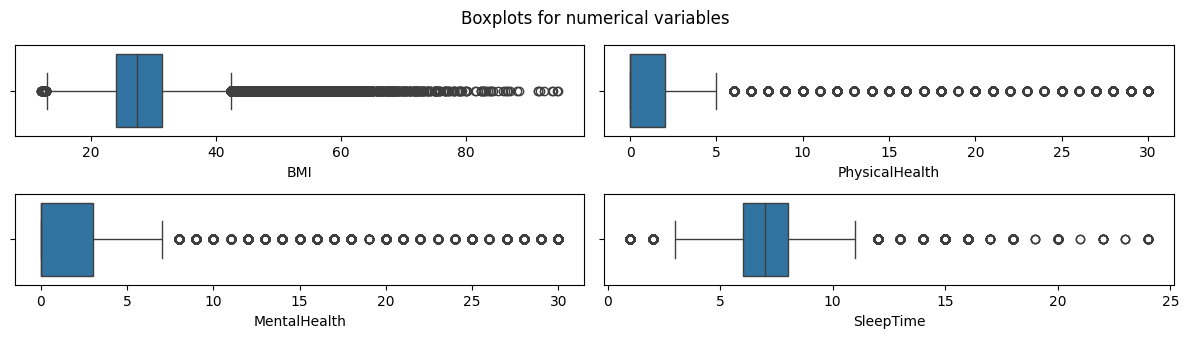

In [16]:
numeric_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), len(numeric_cols)//2, i)
    sns.boxplot(x=data[column])

plt.suptitle('Boxplots for numerical variables')
plt.tight_layout()
plt.show()

In [ ]:
# Scatterplots for each of the numerical variables
for var in ('BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'):
  plt.scatter(data.index, data[var], label=var)
  # Adjust labels
  plt.xticks([])
  plt.ylabel(var)
  # Add title
  plt.title(f'Scatterplot for variable {var}')
  # Add legend
  plt.legend()
  # Show plot
  plt.show()

In [ ]:
X = data.drop('HeartDisease', axis=1)  # 'HeartDisease' is the target column
y = data['HeartDisease']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Encode categorical columns
categorical_cols = X.dtypes == object
categorical_cols = list(categorical_cols[categorical_cols].index)
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 3. Feature engineering

# 4. Modelling

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Precision:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

# Analyze feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:\n", feature_importances)

Precision: 0.9042980659484983
Classification report:
               precision    recall  f1-score   support

          No       0.92      0.98      0.95     58367
         Yes       0.36      0.12      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959

Feature Importances:
 BMI                 0.352960
SleepTime           0.106040
AgeCategory         0.101661
PhysicalHealth      0.073859
MentalHealth        0.067659
GenHealth           0.056899
Race                0.036295
Diabetic            0.028411
Stroke              0.026277
DiffWalking         0.025510
PhysicalActivity    0.024870
Sex                 0.020327
Asthma              0.020101
Smoking             0.017956
SkinCancer          0.016986
KidneyDisease       0.014616
AlcoholDrinking     0.009574
dtype: float64
